# Analyzing Employee Exit Survey

### Dataset

We'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

### Aim

In this project, we'll try to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results from both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [358]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [359]:
dete_survey.shape

(822, 56)

In [360]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Top 10 columns wiht the most number of null values.

In [361]:
dete_survey.isnull().sum().sort_values(ascending=False).head(10)

Torres Strait                  819
South Sea                      815
Aboriginal                     806
Disability                     799
NESB                           790
Business Unit                  696
Classification                 367
Opportunities for promotion     87
Career Aspirations              76
Wellness programs               56
dtype: int64

In [362]:
dete_count = 0 
for i in dete_survey.isnull().sum().values:
    if i > 0:
        dete_count+=1
print(dete_count)

32


Out of the 56 columns in dete_survey 32 columns have a null value.

In [363]:
tafe_survey.shape

(702, 72)

In [364]:
tafe_survey.isnull().sum().sort_values(ascending=False).head(10)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. NONE                                       265
Contributing Factors. Other                                      265
Contributing Factors. Dissatisfaction                            265
Contributing Factors. Career Move - Self-employment              265
Contributing Factors. Career Move - Private Sector               265
dtype: int64

In [365]:
tafe_count = 0 
for i in tafe_survey.isnull().sum().values:
    if i > 0:
        tafe_count+=1
print(tafe_count)

69


Out of the 72 columns in tafe_survey 69 columns have a null value.

- Many columns in both the dataframes have a lot many null values. 
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Cleaning the Dataframes

Some of the values in the columns have to cleaned and converted to a more readable format in the dete_survey. Values not represented as NaN. Eg : 'Not Stated' as NaN.

In [366]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis. 

In [367]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [368]:
dete_survey_updated.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [369]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [370]:
tafe_survey_updated.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Dropped the unawanted columns form dete_survey and tafe_survey.

Column names should be changed to make them the same in both the dataframes.

Criteria to update the column names:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [371]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ','_')

In [372]:
rename_dict = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [373]:
tafe_survey_updated = tafe_survey_updated.rename(columns = rename_dict)

In [374]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [375]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Because we eventually want to combine them, we have standardized the column names of both the dataframes.

Select only the data for survey respondents who have a Resignation separation type.

In [376]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [377]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [378]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation',na=False)].copy()

In [379]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation',na=False)].copy()

For this project, we have only analyzed survey respondents who resigned, so their separation type contains the string 'Resignation'.
dete_survey contains multiple separation types with the string 'Resignation':

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate


Checking the years in each dataframe for logical inconsistencies

In [380]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

Cleaning the cease_date column

In [381]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract("([2][0-9]{3})",expand = True).astype(float)

In [382]:
dete_resignations['cease_date'].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [383]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We can verify:

There aren't any major issues with the years in the datframes.

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

We have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

Creating a new column named institute_service in dete_resignations.
- Subtracting the dete_start_date from the cease_date.
- Assigning the result to a new column named institute_service.

In [384]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [385]:
dete_resignations['institute_service'].value_counts().head(5)

5.0    23
1.0    22
3.0    20
0.0    20
6.0    17
Name: institute_service, dtype: int64

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

In [386]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [387]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Converting the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.

In [388]:
from numpy import nan
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    if value == '-':
        return False
    else:
        return True

In [389]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

In [390]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [391]:
columns_1 = [
'job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload',
]

Converting the above columns in dete_resignation to true, false or nan values using .any()

In [392]:
dete_resignations['dissatisfied'] = dete_resignations[columns_1].any(axis='columns')
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

tafe_survey_updated:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

### Combining the 2 Dataframes

In [393]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [394]:
dete_resignations_up.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [395]:
tafe_resignations_up.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [396]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [397]:
combined.columns

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'Institute', 'WorkArea', 'aboriginal',
       'age', 'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'classification',
       'dete_start_date', 'disability', 'dissatisfaction_with_the_department',
       'dissatisfied', 'employment_conditions', 'employment_status', 'gender',
       'id', 'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'jo

Dropping the columns which have less than 500 non-null values.

In [398]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [399]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

In [400]:
combined_updated.head(5)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


Combined our datasets, drop any columns with less than 500 non null values using thresh parameter.

Clean up the institute_service column

In [401]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [402]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [403]:
combined_updated['institute_service_up'].value_counts(dropna=False).head(5)

 1.0    159
NaN      88
 3.0     83
 5.0     56
 7.0     34
Name: institute_service_up, dtype: int64

In [404]:
def career_stage(value):
    if value<3:
        return 'New'
    elif value>=3 and value<=6:
        return 'Experienced'
    elif value>=7 and value<=10:
        return 'Established'
    elif value>=11:
        return 'Veteran'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'New'

institute_service column was tricky to clean because it currently contained values in a couple different forms.
To analyze the data, we've converted these numbers into categories.

In [405]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage) 

In [406]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [407]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [408]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [409]:
dis_pct = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

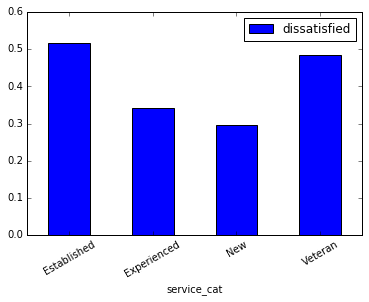

In [410]:
%matplotlib inline
dis_pct.plot(kind='bar',rot=30)

In [411]:
dis_pct

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


### Conclusion

From the above analysis it is clear that employees in the Established and Veteran stages, that is, employees with 7 or more years of service are more likely to resign as they are more dissatisfied than Experienced and New Employees.

Filling the missing data is critical to furthering the analysis.

### Further Analysis

In [418]:
dete_resignations_up['dissatisfied'].value_counts(normalize=True)

False    0.5209
True     0.4791
Name: dissatisfied, dtype: float64

In [419]:
tafe_resignations_up['dissatisfied'].value_counts(normalize=True)

False    0.725904
True     0.274096
Name: dissatisfied, dtype: float64

More employees in the DETE survey(47.79%) ended their employment because of dissatisfaction than in tafe_survey(27%).

In [444]:
combined_updated['age_groups'] = combined_updated['age'].str.extract(r'(\d+)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [445]:
def age_group(age):
    if pd.isnull(age):
        return np.nan
    age = int(age)
    if age >=55:
        return "Senior"
    elif age>=40 and age<55:
        return "middle-aged"
    elif age>=25 and age<40:
        return "adult"
    else:
        return "young adult"

In [446]:
combined_updated['age_groups'] = combined_updated['age_groups'].apply(age_group)

In [449]:
age_pivot = combined_updated.pivot_table(values='dissatisfied', index='age_groups')
#dis_pct = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

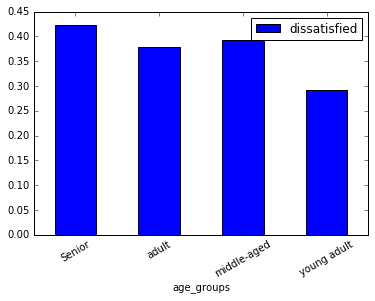

In [452]:
age_pivot.plot(kind='bar',rot=30)

In [453]:
age_pivot

,dissatisfied
age_groups,
Senior,0.423077
adult,0.378109
middle-aged,0.391837
young adult,0.291667


Young adults seem to be the least dissatisfied with the Seniors being the most dissatisfied.